## **Task 2: Exploratory Data Analysis (EDA)**

In [1]:
import os
import sys
system_path = os.path.abspath('..')
if system_path not in sys.path:
    sys.path.append(system_path)

%load_ext autoreload
%autoreload 2

In [2]:
from src.eda_credit_risk import *

### 2.1 Overview of Data

In [3]:
dataset = load_data('../data/raw/data.csv')

----------------- Dataset loaded successfully! --------------------
Shape: (95662, 16)


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [5]:
# Number of Numerical Columns in the dataset 
import numpy as np
print(f"Number of numeric columns: {len(dataset.select_dtypes(include = np.number).columns)}")
dataset.describe(include=[np.number])

Number of numeric columns: 5


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.00,95662.00,95662.00,95662.00,95662.00
mean,256.00,6717.85,9900.58,2.26,0.00
std,0.00,123306.80,123122.09,0.73,0.04
min,256.00,-1000000.00,2.00,0.00,0.00
25%,256.00,-50.00,275.00,2.00,0.00
50%,256.00,1000.00,1000.00,2.00,0.00
75%,256.00,2800.00,5000.00,2.00,0.00
max,256.00,9880000.00,9880000.00,4.00,1.00


In [19]:
# Number of catagorical columns 
print(f"Number of Catagorical columns: {len(dataset.select_dtypes(include = ['object', 'category']).columns)}")
dataset.describe(include = ['object', 'category'])

Number of Catagorical columns: 11


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
count,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662
unique,95662,94809,3633,3627,3742,1,6,23,9,4,94556
top,TransactionId_35670,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_3,2018-12-24T16:30:13Z
freq,1,28,30893,32630,4091,95662,38189,32635,45405,56935,17


In [22]:
# Detect Missing values in the dataset 
display_missing_values(dataset)


Missing Values Summary:
  No missing values found in any column.


### Distribution of Numerical Features
Visualize the distribution of numerical features to identify patterns, skewness, and potential outliers.

Skewness for CountryCode: 0.00
  --> CountryCode is relatively symmetric.


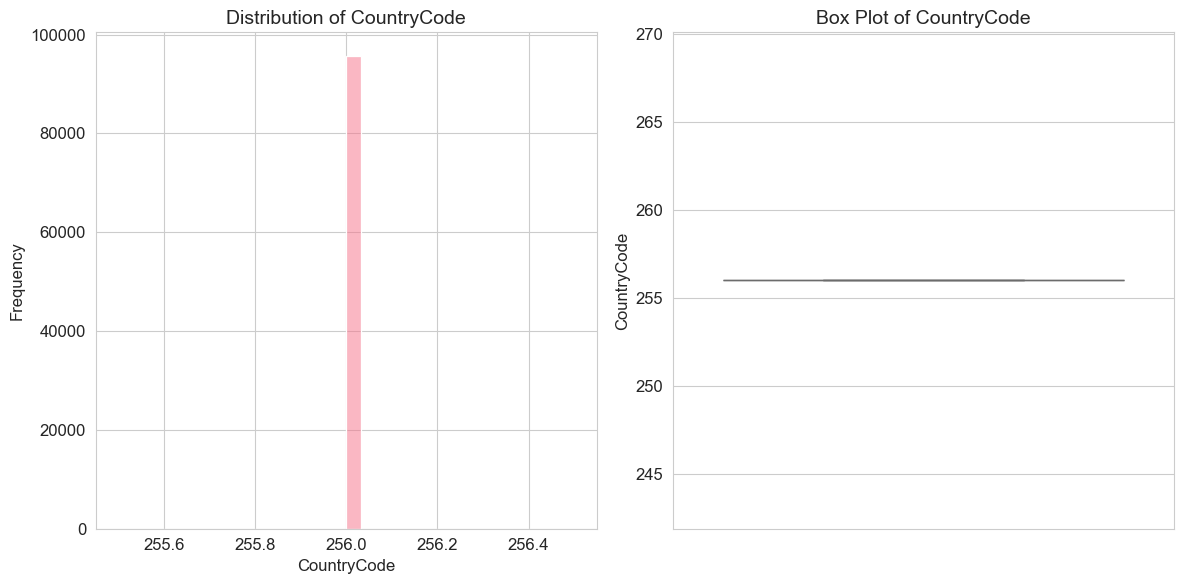

Skewness for Amount: 51.10
  --> Amount is positively skewed (tail to the right).


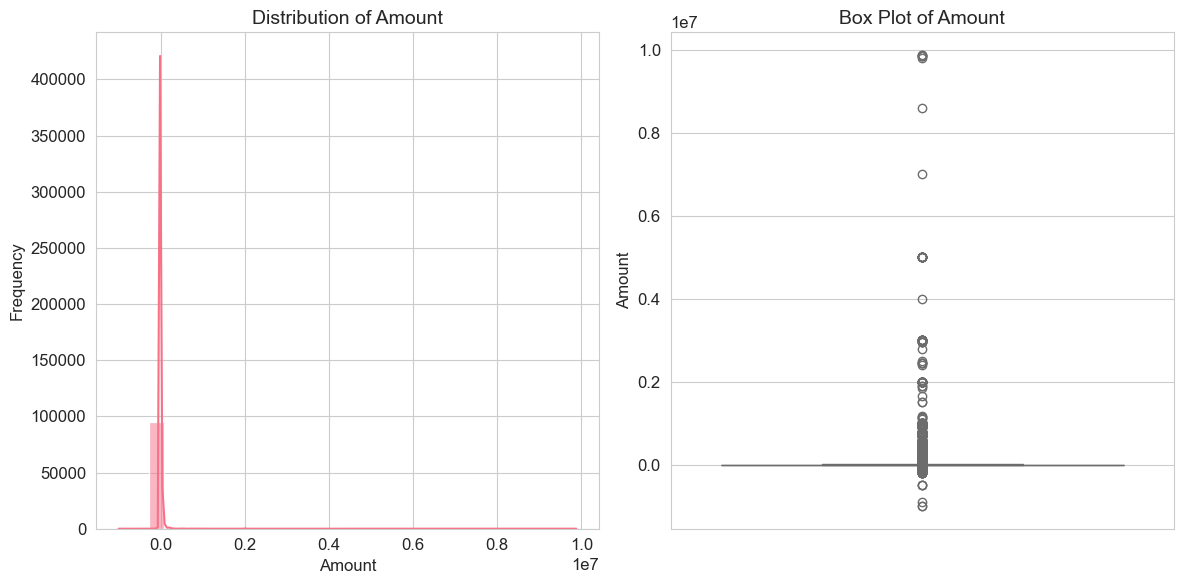

Skewness for Value: 51.29
  --> Value is positively skewed (tail to the right).


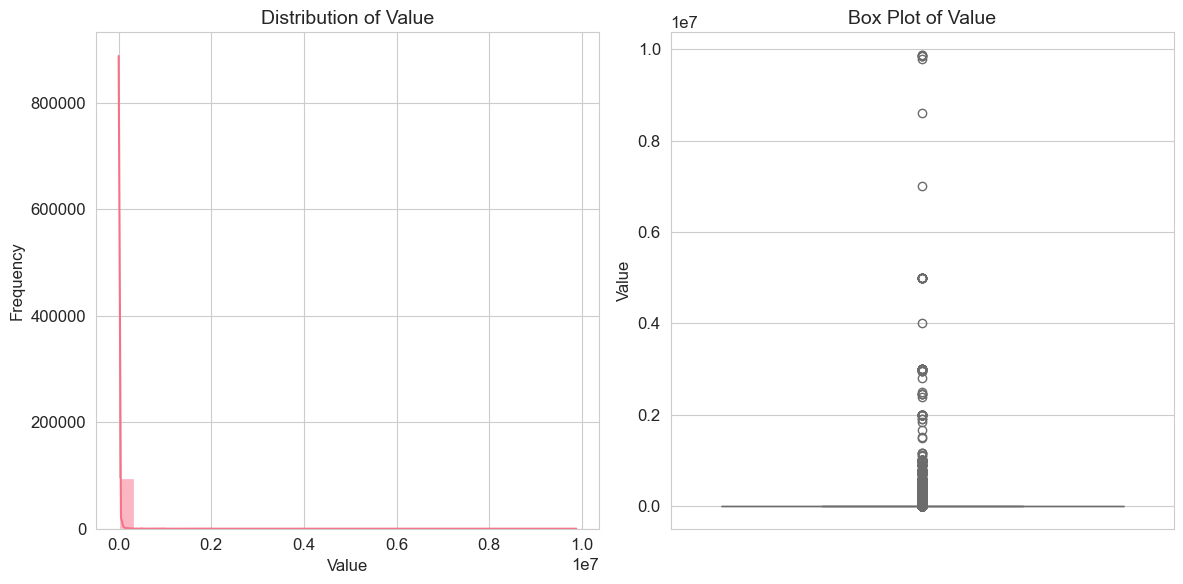

Skewness for PricingStrategy: 1.66
  --> PricingStrategy is positively skewed (tail to the right).


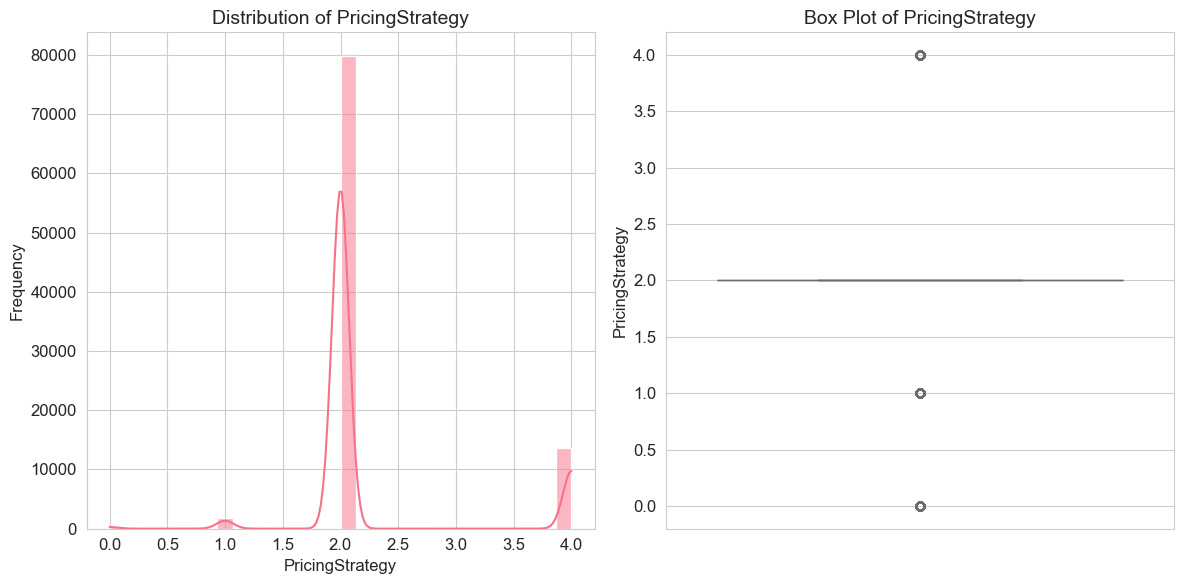

Skewness for FraudResult: 22.20
  --> FraudResult is positively skewed (tail to the right).


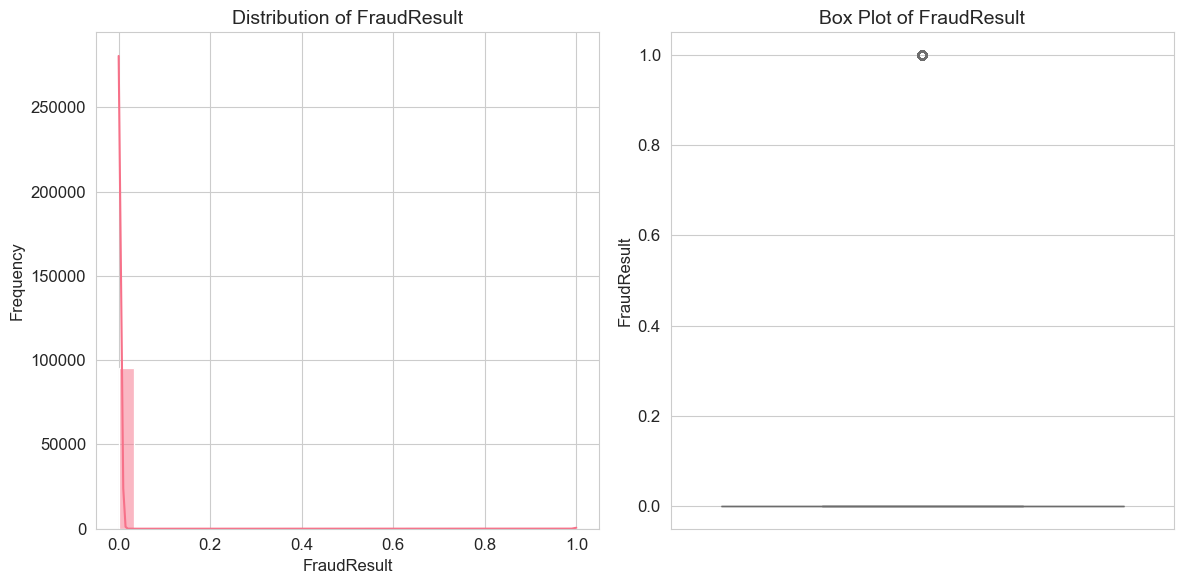


Outlier Analysis (IQR Method):
  CountryCode: 0 outliers (0.00%)
  Amount: 24441 outliers (25.55%)
  Value: 9021 outliers (9.43%)
  PricingStrategy: 15814 outliers (16.53%)
  FraudResult: 193 outliers (0.20%)


In [33]:
analysis_numerical_distributions(dataset)

In [34]:
handle_skewness(dataset)

SKEWNESS ANALYSIS & RECOMMENDATIONS

CountryCode:
  Skewness: 0.00
  Type: RELATIVELY SYMMETRIC
  Recommendations:
    - No transformation needed
    - Standard preprocessing works fine
    - Linear models (Logistic Regression) suitable
    - StandardScaler appropriate

Amount:
  Skewness: 51.10
  Type: POSITIVE SKEW
  Recommendations:
    - Apply log transformation: np.log1p(df['Amount'])
    - Use RobustScaler instead of StandardScaler
    - Consider winsorization for outliers
    - Models: Random Forest, XGBoost handle this well

Value:
  Skewness: 51.29
  Type: POSITIVE SKEW
  Recommendations:
    - Apply log transformation: np.log1p(df['Value'])
    - Use RobustScaler instead of StandardScaler
    - Consider winsorization for outliers
    - Models: Random Forest, XGBoost handle this well

PricingStrategy:
  Skewness: 1.66
  Type: POSITIVE SKEW
  Recommendations:
    - Apply log transformation: np.log1p(df['PricingStrategy'])
    - Use RobustScaler instead of StandardScaler
    - C

{'CountryCode': np.float64(0.0),
 'Amount': np.float64(51.098489522819115),
 'Value': np.float64(51.29108598736249),
 'PricingStrategy': np.float64(1.6590573072757961),
 'FraudResult': np.float64(22.196294806589147)}

In [35]:
analyze_skewness_impact(dataset)

SKEWNESS THRESHOLD IMPACT ANALYSIS
Feature		Skewness	Thresholds that would transform:
----------------------------------------------------------------------
Amount         	  51.10	0.5, 1.0, 1.5, 2.0
Value          	  51.29	0.5, 1.0, 1.5, 2.0
PricingStrategy	   1.66	0.5, 1.0, 1.5
FraudResult    	  22.20	0.5, 1.0, 1.5, 2.0

Summary by threshold:
  0.5: 4/5 features (80.0%)
  1.0: 4/5 features (80.0%)
  1.5: 4/5 features (80.0%)
  2.0: 3/5 features (60.0%)


# Categorical columns analysis 

In [39]:
analyze_categorical_distributions(dataset)


CATEGORICAL FEATURES DISTRIBUTION ANALYSIS

--- TransactionId ---
Unique categories: 95662
Missing values: 0 (0.00%)

Top 10 categories:
  1. TransactionId_35670: 1 (0.00%)
  2. TransactionId_76871: 1 (0.00%)
  3. TransactionId_73770: 1 (0.00%)
  4. TransactionId_26203: 1 (0.00%)
  5. TransactionId_380: 1 (0.00%)
  6. TransactionId_28195: 1 (0.00%)
  7. TransactionId_23223: 1 (0.00%)
  8. TransactionId_118063: 1 (0.00%)
  9. TransactionId_100640: 1 (0.00%)
  10. TransactionId_51905: 1 (0.00%)
  ... and 95652 more categories: 95652 (99.99%)

Insights for TransactionId:
  ✅ Good category balance: Most common category is 0.0%
  ⚠️  95662 rare categories (<1% each) found
  ⚠️  High cardinality: 95662 unique categories
----------------------------------------

--- BatchId ---
Unique categories: 94809
Missing values: 0 (0.00%)

Top 10 categories:
  1. BatchId_67019: 28 (0.03%)
  2. BatchId_51870: 16 (0.02%)
  3. BatchId_113893: 14 (0.01%)
  4. BatchId_127204: 12 (0.01%)
  5. BatchId_116835:

In [40]:
get_categorical_summary(dataset)

,Column,Unique_Count,Missing_Count,Missing_Percentage,Most_Common,Most_Common_Count,Most_Common_Percentage,Cardinality_Level,Balance_Level
0,TransactionId,95662,0,0.00,TransactionId_35670,1,0.00,High,Balanced
1,BatchId,94809,0,0.00,BatchId_67019,28,0.03,High,Balanced
2,AccountId,3633,0,0.00,AccountId_4841,30893,32.29,High,Balanced
3,SubscriptionId,3627,0,0.00,SubscriptionId_3829,32630,34.11,High,Balanced
4,CustomerId,3742,0,0.00,CustomerId_7343,4091,4.28,High,Balanced
5,CurrencyCode,1,0,0.00,UGX,95662,100.00,Low,Imbalanced
6,ProviderId,6,0,0.00,ProviderId_4,38189,39.92,Low,Balanced
7,ProductId,23,0,0.00,ProductId_6,32635,34.11,Moderate,Balanced
8,ProductCategory,9,0,0.00,financial_services,45405,47.46,Low,Moderate
9,ChannelId,4,0,0.00,ChannelId_3,56935,59.52,Low,Moderate


# Categorical Features Summary Interpretation

## Quick Assessment Guide:

| Metric | Good | Warning | Critical |
|--------|------|---------|----------|
| **Missing %** | <5% | 5-20% | >20% |
| **Cardinality** | <20 | 20-50 | >50 |
| **Balance** | <40% | 40-60% | >60% |

## Key Actions Needed:

### **High Priority:**
- **High cardinality features**: Use target encoding or feature hashing
- **Severely imbalanced features**: Consider binary flags or resampling
- **High missing %**: Impute or create missing indicator

### **Medium Priority:**
- **Moderate imbalance**: Monitor model performance
- **Moderate cardinality**: Test different encoding methods

### **Low Priority:**
- **Well-balanced features**: Standard encoding works fine
- **Low cardinality**: One-hot encoding appropriate

## Credit Risk Specific:
- **Geographic features**: Often high cardinality → target encoding
- **Occupation/Industry**: May need grouping for rare categories
- **Education levels**: Usually balanced → one-hot encoding

Categorical Features Summary Interpretation
Key Findings:

🔴 High Priority Issues:
- CurrencyCode: 100% single value (UGX) 
- Remove this feature (no predictive value)
- High Cardinality Features: TransactionId, BatchId, AccountId, SubscriptionId,  CustomerId, TransactionStartTime (>3000 unique values each) 
- Use target encoding or feature hashing

🟡 Medium Priority:
- ProductCategory: 47.5% financial_services, 47.1% airtime - Moderate imbalance but acceptable
- ChannelId: 59.5% ChannelId_3 - Moderate imbalance but manageable
- ProductId: 23 categories with 14 rare ones (<1% each) 
- Group rare categories

🟢 Low Priority:
- ProviderId: 6 categories, well-distributed - One-hot encoding suitable
- No missing values in any categorical feature - Good data quality
**Recommendation**
- Remove: CurrencyCode (constant value)
- Target Encoding: TransactionId, BatchId, AccountId, SubscriptionId, CustomerId, TransactionStartTime
- One-hot Encoding: ProviderId, ChannelId
- Group Rare Categories: ProductId (combine <1% categories into "Other")
- Feature Engineering: Extract date/time features from TransactionStartTime

Credit Risk Impact:
- Account/Subscription concentration: 32-34% in single accounts suggests potential fraud patterns
- Channel dominance: 59.5% through ChannelId_3 may indicate preferred payment method
- Product focus: 94.5% in financial_services + airtime suggests mobile money transactions

                    CORRELATION ANALYSIS                    
Analyzing correlations for 5 numerical features:
Features: ['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult']

HIGHLY CORRELATED FEATURES ANALYSIS

🔴 HIGH CORRELATIONS (≥0.8):
  Amount ↔ Value: 0.990
    → Consider removing one feature to avoid multicollinearity

🟡 MODERATE CORRELATIONS (≥0.5):
  Amount ↔ FraudResult: 0.557
  Value ↔ FraudResult: 0.567


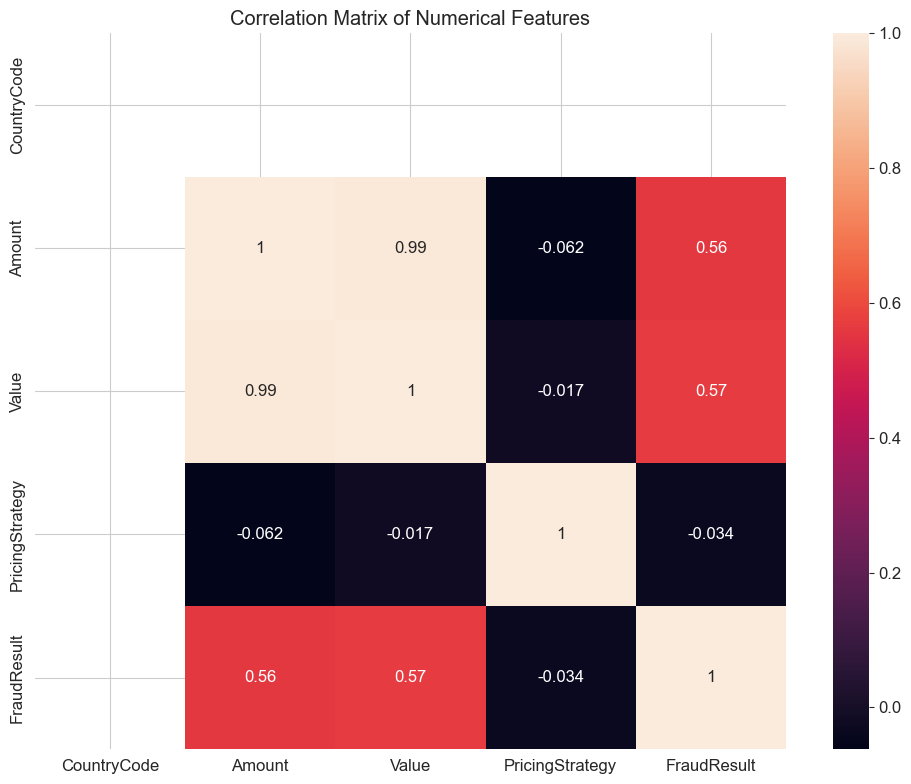


CORRELATION INSIGHTS & RECOMMENDATIONS
  • High multicollinearity detected - feature selection needed
  • Consider PCA or feature elimination


In [53]:
correlation_analysis(dataset)


### Outlier Detection


OUTLIER DETECTION ANALYSIS


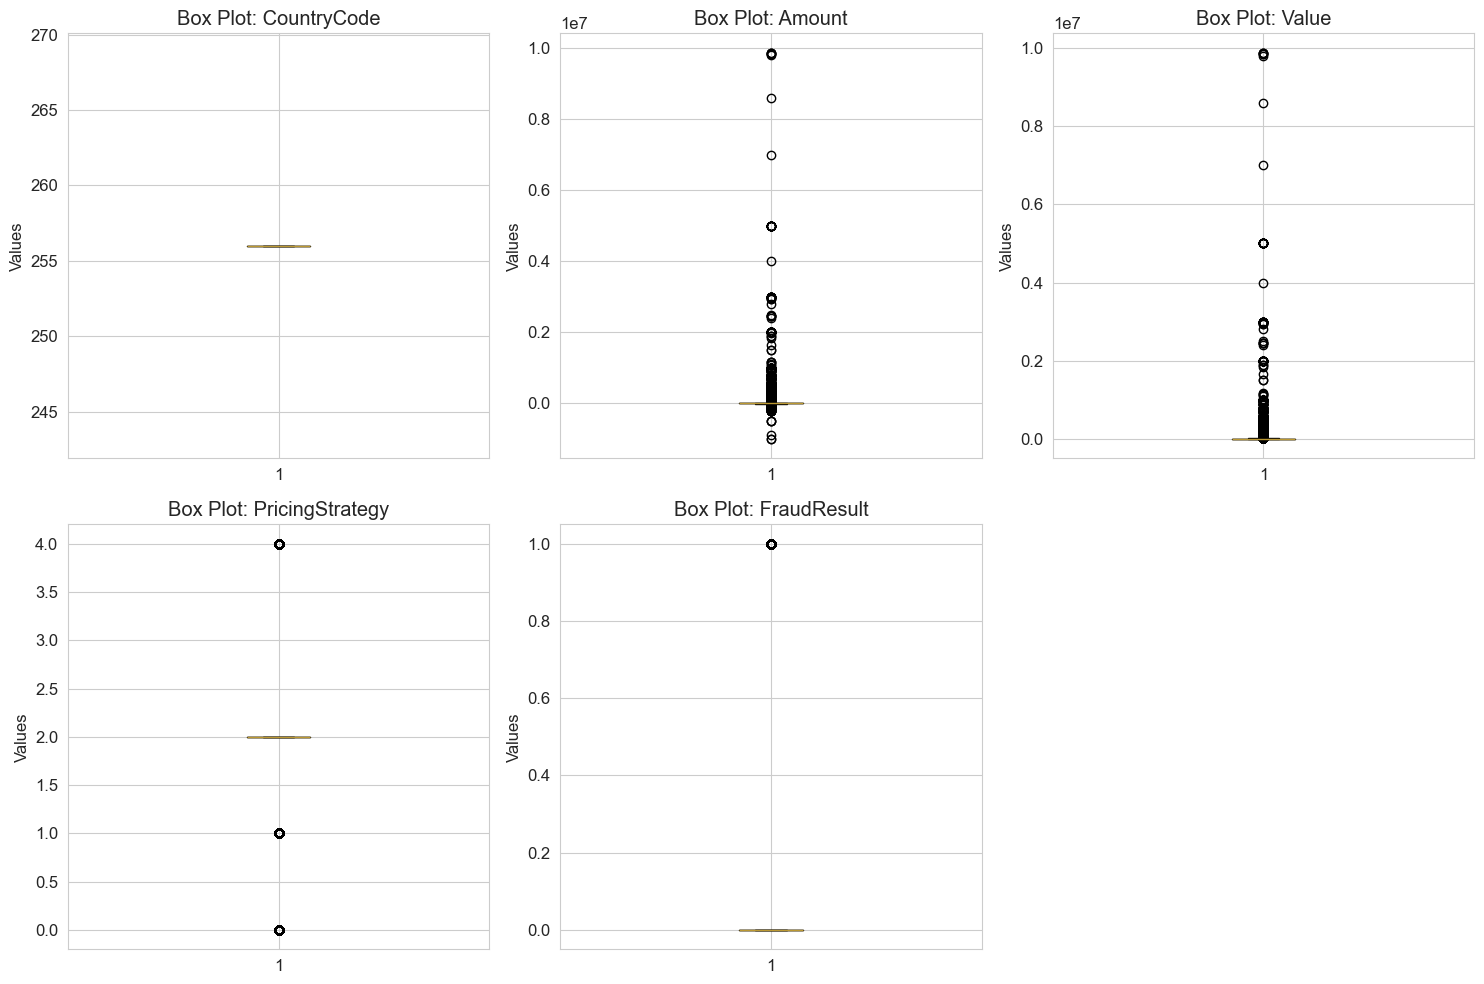

 -------- Outlier Summary: --------- 
        feature  outlier_count  outlier_percent
    CountryCode              0             0.00
         Amount          24441            25.55
          Value           9021             9.43
PricingStrategy          15814            16.53
    FraudResult            193             0.20


In [6]:
# Call the outlier detection function
detect_outliers(dataset)

**Outlier Visualization Interpretation**

The box plots above display the distribution and outliers for each numerical feature:
- **CountryCode**: No variation; all values are 256, so no outliers or spread.
- **Amount** and **Value**: Both show a large number of extreme outliers, with most data concentrated near the lower end and a few very high values. This indicates a highly skewed distribution, suggesting the need for transformation (e.g., log) or robust scaling.
- **PricingStrategy**: Most values are concentrated at a few discrete points, with a small number of higher values as outliers.
- **FraudResult**: Almost all values are 0, with a few 1s as outliers, reflecting the class imbalance in the target variable.

Overall, the plots confirm the presence of significant outliers in Amount and Value, and highlight the need for careful handling of skewed distributions and class imbalance in subsequent modeling steps.
